In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist
import datetime

In [2]:
(train_images, train_labels),(test_images,test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
print(f"Train images: {train_images.shape}")
print(f"Train labels: {train_labels.shape}")
print(f"Test images: {test_images.shape}")
print(f"Test labels: {test_labels.shape}")

Train images: (60000, 28, 28)
Train labels: (60000,)
Test images: (10000, 28, 28)
Test labels: (10000,)


In [4]:
train_images = np.reshape(train_images, (-1, 784))
test_images = np.reshape(test_images, (-1, 784))

In [5]:
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

In [6]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

Text(0, 0.5, 'Explained Variance')

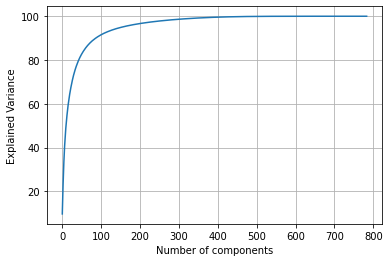

In [7]:
pca_784 = PCA(n_components = 784)
pca_784.fit(train_images)

plt.grid()
plt.plot(np.cumsum(pca_784.explained_variance_ratio_ * 100))
plt.xlabel('Number of components')
plt.ylabel('Explained Variance')

In [8]:
pca_100 = PCA(n_components = 100)
pca_100.fit(train_images)

train_images_reduced = pca_100.transform(train_images)
test_images_reduced  = pca_100.transform(test_images)

In [9]:
from tensorflow.keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [10]:
print(f"Reduced train images shape: {train_images_reduced.shape}")
print(f"Reduced test images shape: {test_images_reduced.shape}")

Reduced train images shape: (60000, 100)
Reduced test images shape: (10000, 100)


In [11]:
print(np.sum(pca_100.explained_variance_ratio_ * 100))     # We are able to retain 91.43% of variance of data after applying PCA 

91.42996


# ***Model without regularization***

In [12]:
model = keras.models.Sequential()
model.add(keras.layers.InputLayer(input_shape = (100, )))
model.add(keras.layers.Dense(units = 64, activation = 'relu'))
model.add(keras.layers.Dense(units = 32, activation = 'relu'))
model.add(keras.layers.Dense(units = 10, activation = 'softmax'))

model.compile(
    loss = keras.losses.categorical_crossentropy,
    optimizer = 'adam',
    metrics = ['accuracy']
)

In [14]:
model.fit(train_images_reduced, train_labels, batch_size = 128, epochs = 10, verbose = 1, validation_split = 0.15)

Epoch 1/10
399/399 [==============================] - 2s 3ms/step - loss: 0.6633 - accuracy: 0.8168 - val_loss: 0.2250 - val_accuracy: 0.9360
Epoch 2/10
399/399 [==============================] - 1s 3ms/step - loss: 0.2085 - accuracy: 0.9394 - val_loss: 0.1597 - val_accuracy: 0.9528
Epoch 3/10
399/399 [==============================] - 1s 2ms/step - loss: 0.1523 - accuracy: 0.9549 - val_loss: 0.1341 - val_accuracy: 0.9612
Epoch 4/10
399/399 [==============================] - 1s 3ms/step - loss: 0.1209 - accuracy: 0.9647 - val_loss: 0.1168 - val_accuracy: 0.9664
Epoch 5/10
399/399 [==============================] - 1s 3ms/step - loss: 0.1002 - accuracy: 0.9709 - val_loss: 0.1068 - val_accuracy: 0.9682
Epoch 6/10
399/399 [==============================] - 1s 2ms/step - loss: 0.0851 - accuracy: 0.9748 - val_loss: 0.1033 - val_accuracy: 0.9691
Epoch 7/10
399/399 [==============================] - 1s 3ms/step - loss: 0.0741 - accuracy: 0.9785 - val_loss: 0.0968 - val_accuracy: 0.9704
Epoch 

In [15]:
model.evaluate(test_images_reduced, test_labels, batch_size = 128, verbose = 1)

79/79 [==============================] - 0s 2ms/step - loss: 0.0876 - accuracy: 0.9721


[0.0875641480088234, 0.972100019454956]

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                6464      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 8,874
Trainable params: 8,874
Non-trainable params: 0
_________________________________________________________________


# ***Model with regularization***

In [13]:
model_op = keras.models.Sequential()
model_op.add(keras.layers.InputLayer(input_shape = (100, )))
model_op.add(keras.layers.Dense(units = 64, activation = 'relu'))
model_op.add(keras.layers.Dense(units = 32, activation = 'relu', kernel_regularizer = keras.regularizers.L2(l2 = 0.005)))
model_op.add(keras.layers.Dense(units = 10, activation = 'softmax'))

model_op.compile(
    loss = keras.losses.categorical_crossentropy,
    optimizer = 'adam',
    metrics = ['accuracy']
)

In [17]:
model_op.fit(train_images_reduced, train_labels, batch_size = 128, epochs = 10, verbose = 1, validation_split = 0.15)

Epoch 1/10
399/399 [==============================] - 2s 3ms/step - loss: 0.8377 - accuracy: 0.8169 - val_loss: 0.3810 - val_accuracy: 0.9344
Epoch 2/10
399/399 [==============================] - 1s 3ms/step - loss: 0.3422 - accuracy: 0.9367 - val_loss: 0.2697 - val_accuracy: 0.9491
Epoch 3/10
399/399 [==============================] - 1s 3ms/step - loss: 0.2582 - accuracy: 0.9490 - val_loss: 0.2150 - val_accuracy: 0.9593
Epoch 4/10
399/399 [==============================] - 1s 3ms/step - loss: 0.2136 - accuracy: 0.9577 - val_loss: 0.1879 - val_accuracy: 0.9626
Epoch 5/10
399/399 [==============================] - 1s 2ms/step - loss: 0.1853 - accuracy: 0.9635 - val_loss: 0.1690 - val_accuracy: 0.9666
Epoch 6/10
399/399 [==============================] - 1s 3ms/step - loss: 0.1657 - accuracy: 0.9674 - val_loss: 0.1567 - val_accuracy: 0.9676
Epoch 7/10
399/399 [==============================] - 1s 3ms/step - loss: 0.1491 - accuracy: 0.9705 - val_loss: 0.1455 - val_accuracy: 0.9718
Epoch 

In [18]:
model_op.evaluate(test_images_reduced, test_labels, batch_size = 128, verbose = 1)

79/79 [==============================] - 0s 2ms/step - loss: 0.1290 - accuracy: 0.9731


[0.128995880484581, 0.9731000065803528]

In [19]:
model_op.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                6464      
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 10)                330       
                                                                 
Total params: 8,874
Trainable params: 8,874
Non-trainable params: 0
_________________________________________________________________
